In [21]:
import os
import json
import time
import numpy as np
import xarray as xr
import pandas as pd
import seaborn as sns
import geopandas as gpd

import dask.array as da
from datetime import datetime

import cartopy.crs as ccrs
import cartopy.feature as cfeature

from matplotlib import patches
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [24]:
lon_min, lon_max, lat_min, lat_max, area, toll = 6.5, 19, 36.5, 48, 'ITALY', 0.002

In [25]:
dir_base = os.path.join('/','media','arturo','T9','Data','Italy','Satellite','5_DOWN')

In [35]:
veneto_dir = os.path.join('/','media','arturo','T9','Data','shapes','Europa','Italy')

if os.path.exists(veneto_dir):
    REGIONS = gpd.read_file(os.path.join(veneto_dir,'Italy_regions.geojson'))
else:
    raise SystemExit(f"File not found: {veneto_dir}")

# update name of REGIONS geopandas
REGIONS = REGIONS.rename(columns={"reg_name": "REGION"})

In [16]:
dir_in = os.path.join(dir_base, 'ITALY_ENSEMBLE_1dy_2002_2023_npix_2_thr_1_acf_mar_genetic_pearson.nc')
DATA = xr.open_dataset(dir_in)

lon2d, lat2d = np.meshgrid(DATA['lon'].values, DATA['lat'].values)

Mev_s = DATA['Mev_s'].values
Mev_d = DATA['Mev_d'].values

DATA

<xarray.Dataset> Size: 72MB
Dimensions:  (year: 22, lat: 240, lon: 260, Tr: 6)
Coordinates:
  * year     (year) int64 176B 2002 2003 2004 2005 2006 ... 2020 2021 2022 2023
  * Tr       (Tr) int64 48B 5 10 20 50 100 200
  * lat      (lat) float32 960B 36.02 36.07 36.12 36.17 ... 47.87 47.92 47.97
  * lon      (lon) float32 1kB 6.025 6.075 6.125 6.175 ... 18.88 18.93 18.97
Data variables:
    NYs      (year, lat, lon) float64 11MB ...
    CYs      (year, lat, lon) float64 11MB ...
    WYs      (year, lat, lon) float64 11MB ...
    NYd      (year, lat, lon) float64 11MB ...
    CYd      (year, lat, lon) float64 11MB ...
    WYd      (year, lat, lon) float64 11MB ...
    Mev_d    (Tr, lat, lon) float64 3MB 69.15 69.15 69.15 ... 87.62 88.35 89.66
    Mev_s    (Tr, lat, lon) float64 3MB 60.23 60.23 60.23 ... 80.34 83.27 83.24
Attributes:
    description:  ENSEMBLE of the downscaled precipitation data for 2002-2023...

In [17]:
print(np.min(Mev_s[3,:,:]), np.max(Mev_s[3,:,:]))
print(np.min(Mev_d[3,:,:]), np.max(Mev_d[3,:,:]))

59.32053214137324 291.3518439897252
65.81497539589435 355.69225318615145


In [62]:
levels = np.arange(40, 360, 20)

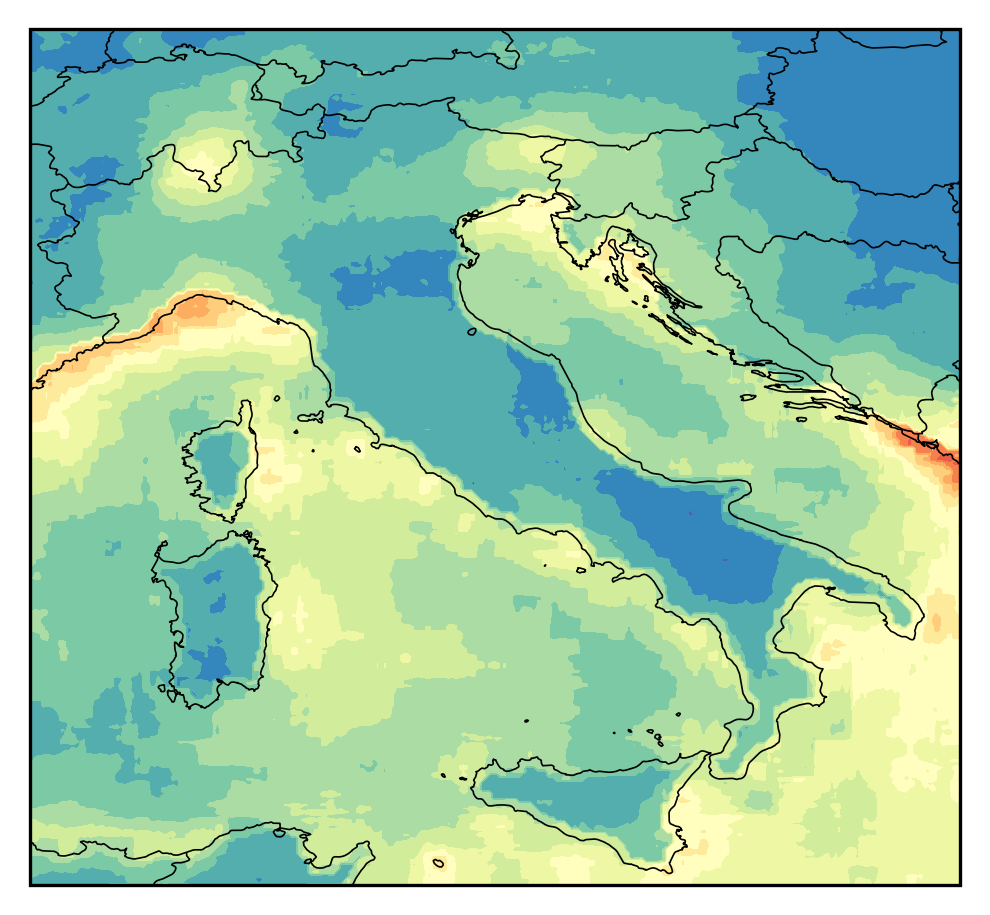

In [66]:
cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(4,4),dpi=300)
gs = gridspec.GridSpec(1,1)

# ==============================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.4,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.4,color='black',zorder=4)
a1 = ax1.contourf(lon2d, lat2d, Mev_s[3,:,:], levels=levels, cmap=cmap, extend='max')
# ax1.axis('off')
ax1.set_facecolor('white')
fig.patch.set_alpha(0)

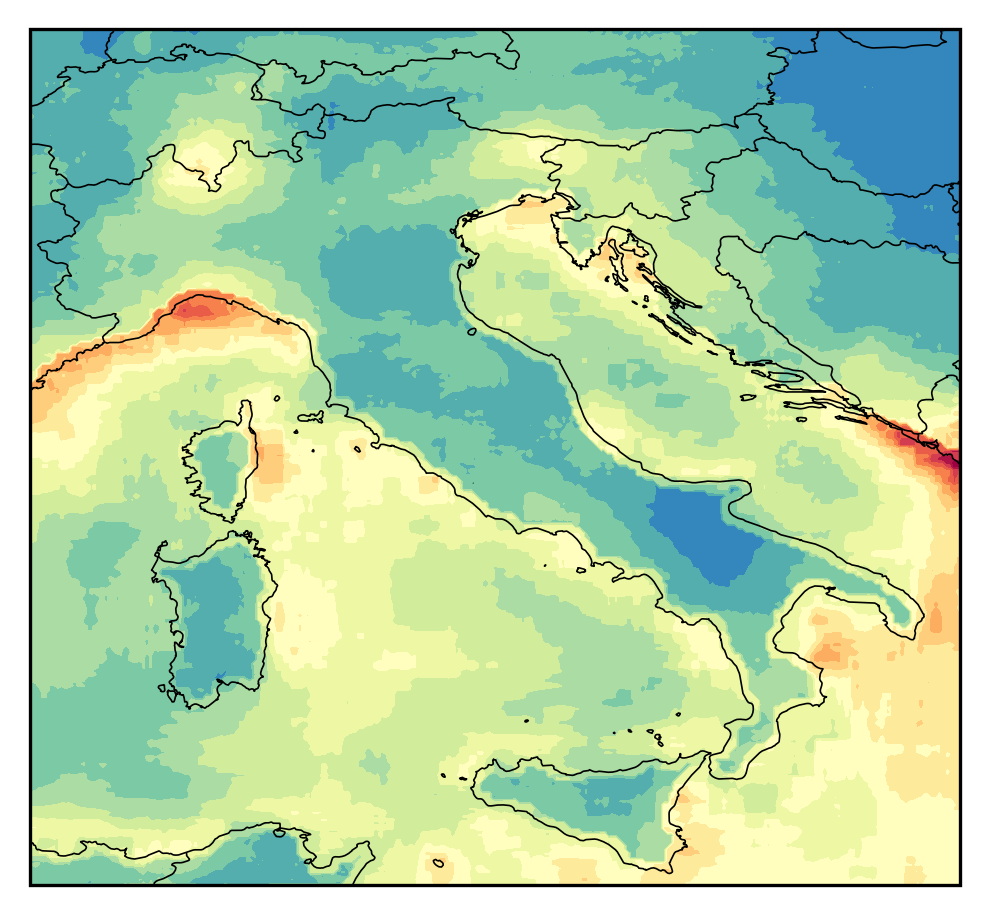

In [67]:
cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(4,4),dpi=300)
gs = gridspec.GridSpec(1,1)

# ==============================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.4,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.4,color='black',zorder=4)
a1 = ax1.contourf(lon2d, lat2d, Mev_d[3,:,:], levels= levels, cmap=cmap, extend='max')
# ax1.axis('off')
ax1.set_facecolor('white')
fig.patch.set_alpha(0)